# How many sets are typically played in a tennis match?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

time_dataframe = pd.DataFrame()
for file in os.listdir("raw/time_parquet"):
    single_stats = pd.read_parquet("raw/time_parquet/" + file)
    time_dataframe = pd.concat([time_dataframe, single_stats], axis= 'rows', ignore_index=True)

time_dataframe.head(10)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852
3,11673993,2894,2309,2084,None,None,1696160248
4,11674000,3177,None,None,None,None,1696089777
5,11674008,3419,3438,3320,None,None,1696099675
6,11674011,1960,3475,2040,None,None,1696178502
7,11674026,2130,1702,None,None,None,1696092102
8,11674032,3216,2694,2561,None,None,1696179281
9,11674034,3071,3039,None,None,None,1696085170


In [4]:
# 1. حذف سطرهایی که پریوداول برابر با نال است
time_dataframe = time_dataframe[time_dataframe['period_1'].notna()]


# 3. محاسبه تعداد ست‌ها
# بررسی اینکه هر پریود مقدار دارد یا خیر
time_dataframe['sets_played'] = time_dataframe[['period_1', 'period_2', 'period_3']].gt(0).sum(axis=1)
time_dataframe

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sets_played
0,11673958,1960,2457,None,None,None,1696097817,2
2,11673963,3403,2431,None,None,None,1696091852,2
3,11673993,2894,2309,2084,None,None,1696160248,3
4,11674000,3177,None,None,None,None,1696089777,1
5,11674008,3419,3438,3320,None,None,1696099675,3
...,...,...,...,...,...,...,...,...
759,11703444,3615,2741,None,None,None,1696255224,2
760,11703445,3764,2468,None,None,None,1696254556,2
761,11703470,3104,2662,None,None,None,1696258777,2
762,11703524,2118,2754,None,None,None,1696256179,2


In [5]:
time_dataframe.drop(columns=['period_4', 'period_5'])

,match_id,period_1,period_2,period_3,current_period_start_timestamp,sets_played
0,11673958,1960,2457,None,1696097817,2
2,11673963,3403,2431,None,1696091852,2
3,11673993,2894,2309,2084,1696160248,3
4,11674000,3177,None,None,1696089777,1
5,11674008,3419,3438,3320,1696099675,3
...,...,...,...,...,...,...
759,11703444,3615,2741,None,1696255224,2
760,11703445,3764,2468,None,1696254556,2
761,11703470,3104,2662,None,1696258777,2
762,11703524,2118,2754,None,1696256179,2


In [6]:
# تعداد تکرار آن عدد
most_frequent_sets = time_dataframe['sets_played'].mode()[0]

# نمایش نتایج
print("sets are typically played in a tennis match:", most_frequent_sets)

sets are typically played in a tennis match: 2


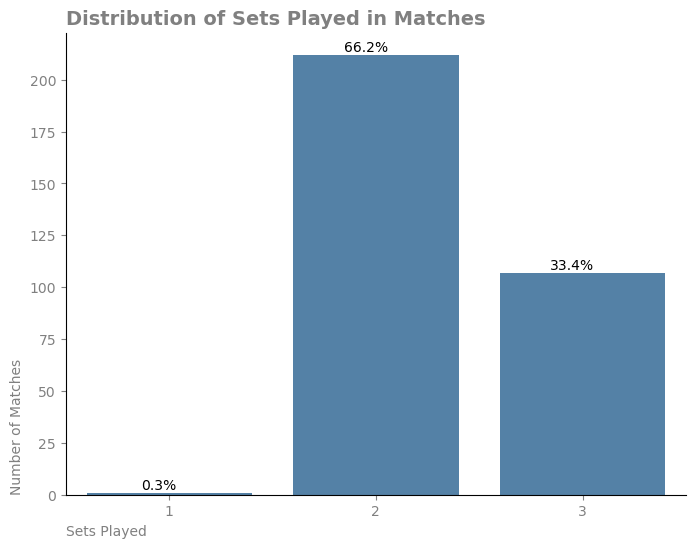

In [20]:


# محاسبه تعداد کل مسابقات
total_matches = len(time_dataframe)

# تنظیمات اندازه نمودار
plt.figure(figsize=(8, 6))

# رسم بارچارت برای شمارش تعداد مسابقاتی که در هر تعداد ست انجام شده است
ax = sns.countplot(x='sets_played', data=time_dataframe, color='#4682b4')

# محاسبه درصد هر تعداد ست از کل
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_matches)  # محاسبه درصد
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', color='black', fontsize=10)

# عنوان و برچسب‌های نمودار
plt.title('Distribution of Sets Played in Matches', fontsize=14, color='gray', loc='left', fontweight='bold')
plt.xlabel('Sets Played', fontsize=10, color='gray', loc='left')
plt.ylabel('Number of Matches', fontsize=10, color='gray', loc='bottom')

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# نمایش نمودار
plt.show()
